In [1]:
import sys; sys.path.append("../")
from DataPreprocessing.DataPreprocessing import *
from DataExploration import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from CorrelationMatrices import *


## Read data 

In [2]:
df = read_data(kind='all')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## Data Set Size

In [3]:
# print size of dataset
print('Number of rows: ', df.shape[0])
print('Number of columns: ', df.shape[1])

Number of rows:  16719
Number of columns:  16


## Unique Values
    - clearly that features like developer has too many unique values so it's
      not preferable to use it in prediction problems

In [4]:
unique= show_unique(df)
unique.head(16)

,#Unique Values
Name,11562
Developer,1696
User_Count,888
Global_Sales,629
Publisher,581
NA_Sales,402
EU_Sales,307
JP_Sales,244
Other_Sales,155
Critic_Count,106


## Detect Outliers
    Number of rows with outliers is 12036 ! which is most of the data
    so we can't just delete them for all features instead we can delete rows 
    with common outliers in more than one column

In [5]:
df_outliers=detect_outliers(df)
df_outliers.head(16)

f:\Fourth Year 2nd term\Data Science\Data_Science-Project\DataExploration\..\DataPreprocessing\DataPreprocessing.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Feature': col, 'Number of outliers': len(outliers)}, ignore_index=True)
f:\Fourth Year 2nd term\Data Science\Data_Science-Project\DataExploration\..\DataPreprocessing\DataPreprocessing.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outliers_df.append({'Feature': col, 'Number of outliers': len(outliers)}, ignore_index=True)
f:\Fourth Year 2nd term\Data Science\Data_Science-Project\DataExploration\..\DataPreprocessing\DataPreprocessing.py:173: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outliers_df = outl

,Feature,Number of outliers
0,Year_of_Release,305
1,NA_Sales,1687
2,EU_Sales,2061
3,JP_Sales,2434
4,Other_Sales,2243
5,Global_Sales,1892
6,Critic_Score,83
7,Critic_Count,251
8,User_Count,1080
9,All,12036


In [6]:
df_without_outliers=remove_all_outliers(df)
print('=>> Number of rows after removing outliers: ', df_without_outliers.shape[0])

Number of outliers to be removed from Year_of_Release: 305
Number of outliers to be removed from NA_Sales: 1674
Number of outliers to be removed from EU_Sales: 1628
Number of outliers to be removed from JP_Sales: 2087
Number of outliers to be removed from Other_Sales: 284
Number of outliers to be removed from Global_Sales: 596
Number of outliers to be removed from Critic_Score: 58
Number of outliers to be removed from Critic_Count: 102
Number of outliers to be removed from User_Count: 515
=>> Number of rows after removing outliers:  9470


## Missing Values
    rows with missing values are vary large > half size of the data
    so we can't drop them all we need to use method for imputation 
    according to the features used.

In [7]:
dropped_df =handle_missing_values(df)
dropped_df.head()

Total Number of rows : 16719
Number of rows with missing values: 9894
Number of rows after dropping: 6825
Number of rows after handling missing values: 6825 and Number of missing values: 0


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


## Show Missing Values Ratios for each column
    - Sadly critic score, user score, developer, and rating have very high
     ratio of missing value however they key features for any video game so
     we can't just drop them or even impute with median. we need to try more
     effective imputation method like: knn,, TODO
    

In [8]:
missing_data=show_nulls(df)
missing_data.head(16)

,Missing Ratio
User_Count,54.602548
Critic_Score,51.330821
Critic_Count,51.330821
Rating,40.486871
User_Score,40.098092
Developer,39.613613
Year_of_Release,1.608948
Publisher,0.322986
Name,0.011962
Genre,0.011962


# Features Histogram
    Let's explore features we have in the data set

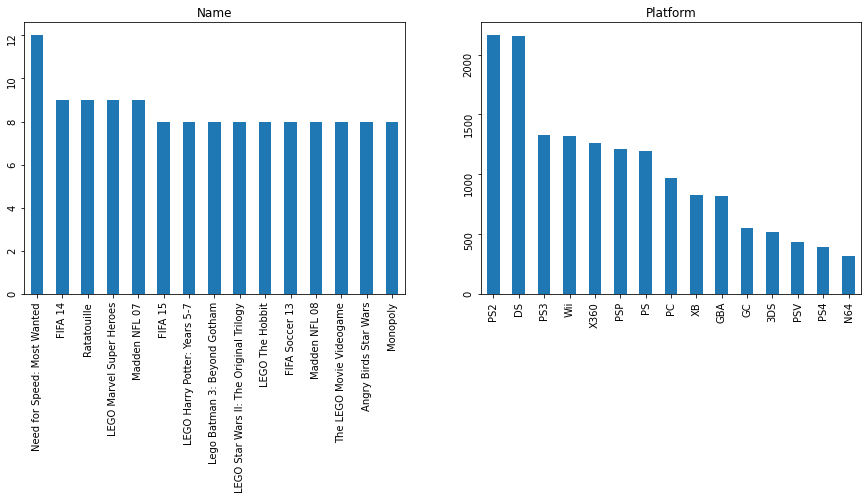

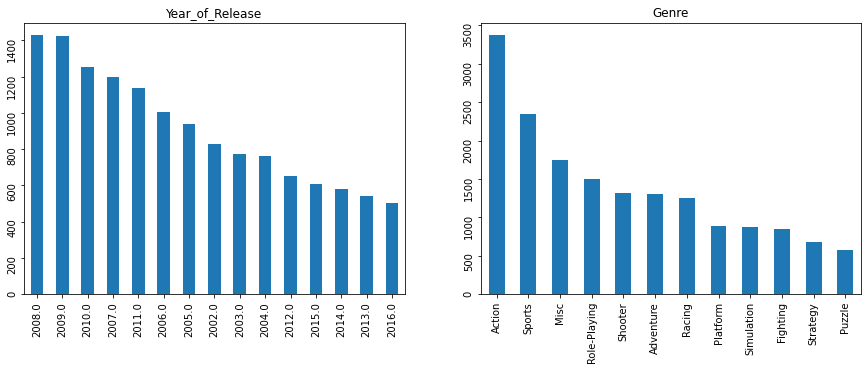

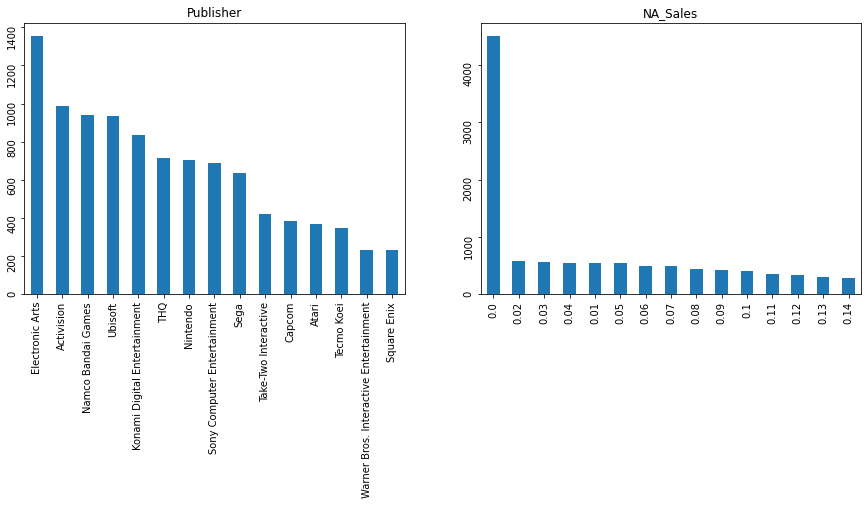

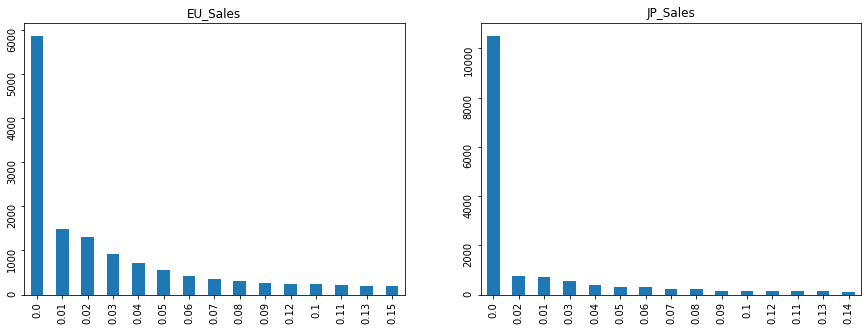

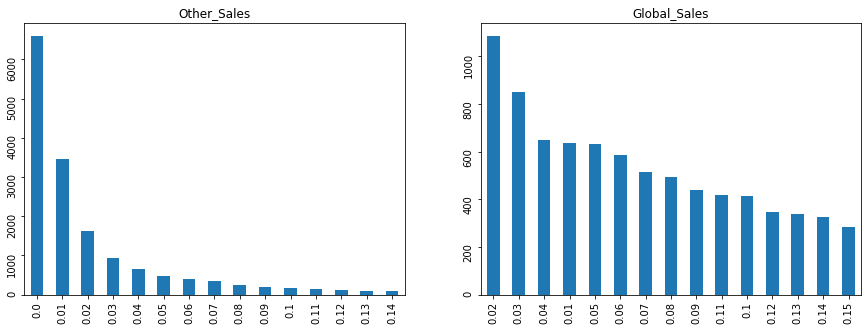

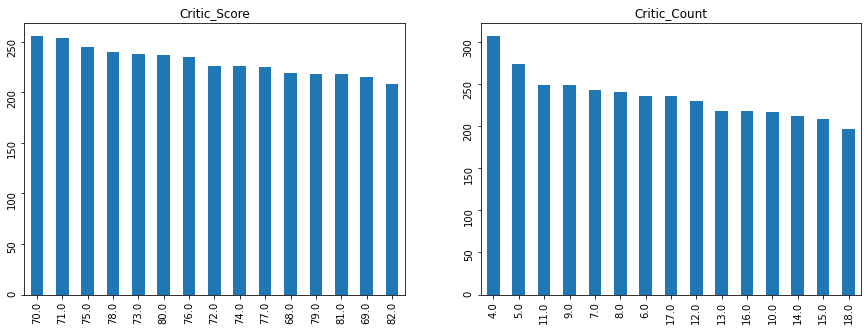

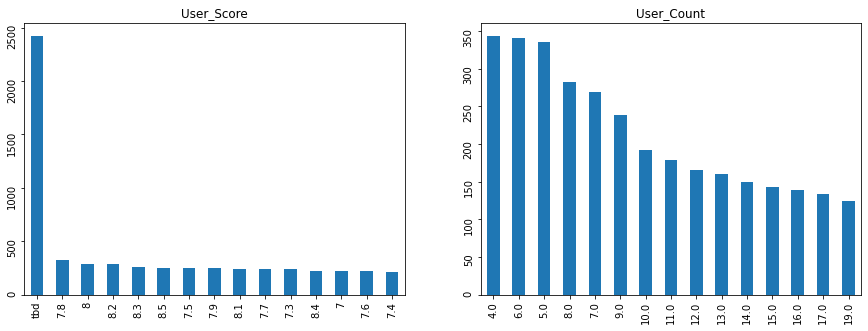

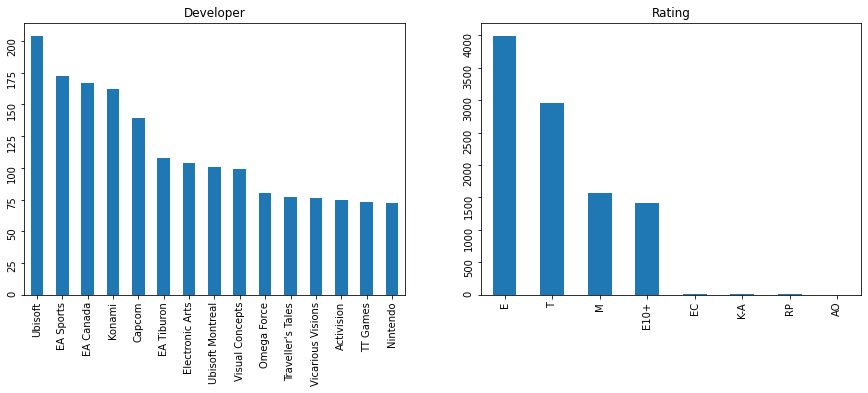

In [9]:
plot_hist(df)

# Exploration
    Let's take a closer look into features we have

## Games Published Annually
    - peak at video games publish in 2010, 2005. production then deceased
      until 2020 give this data, however after searching I found that video 
      games industry has grown exponentially in the past few decades.
      

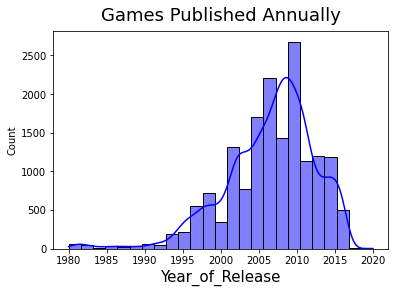

In [10]:
plt_hist('Year_of_Release', 'Games Published Annually',df ,'blue')

## Correlation between numerical features

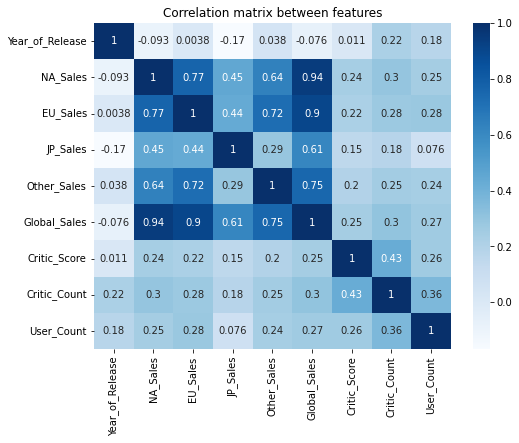

In [11]:
plot_num_corr_matrix(df)

## Correlation between categorical features

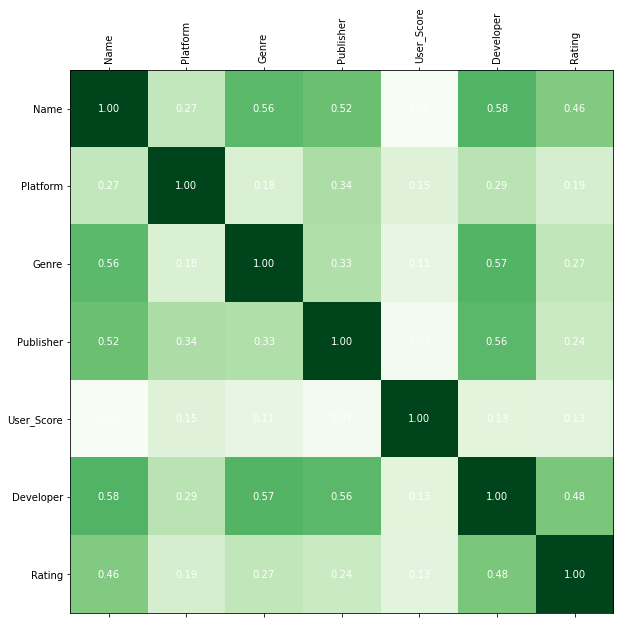

In [12]:
plot_cat_corr_matrix(df)

## Correlation between all features

### Conclusion:
    - The features are not highly correlated with each other most of the matrix 
      below 0.4
    - Sales columns only have very high corr coefficient which indicates that
      high sales of a game in certain Region means high sales in others
    - correlation between critic count and critic score is not low but it's 
      meaningless. 

### Critic Score
     - means an aggregate of array of game design factors compiled 
       by Metacritic staff. a very important feature to predict sales 
       of a game (more about this in predictive question section)


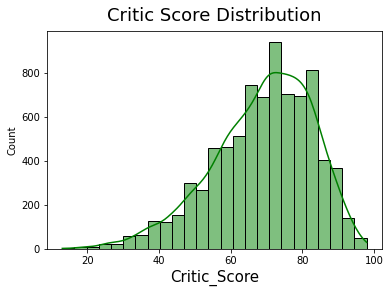

In [13]:
plt_hist('Critic_Score', 'Critic Score Distribution',df, 'green')

### Rating
    - ESRB ratings provide information about what’s in a game or app so parents and 
     consumers can make informed choices about which games are right for their family.
    - from the plot we nearly have only 4 categories E (everyone),M(mature +17),
      T(teenagers) and E10+ (everyone +10)


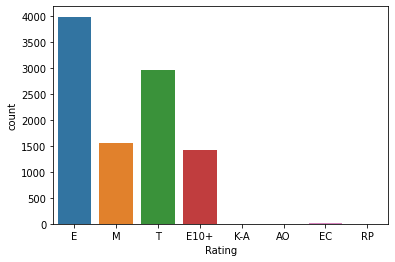

In [14]:
count_plot("Rating", df)